The nodes of G are: V(G) = ['a', 'b', 'c', 'd'] 

The edges of G are: E(G) = [('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')] 



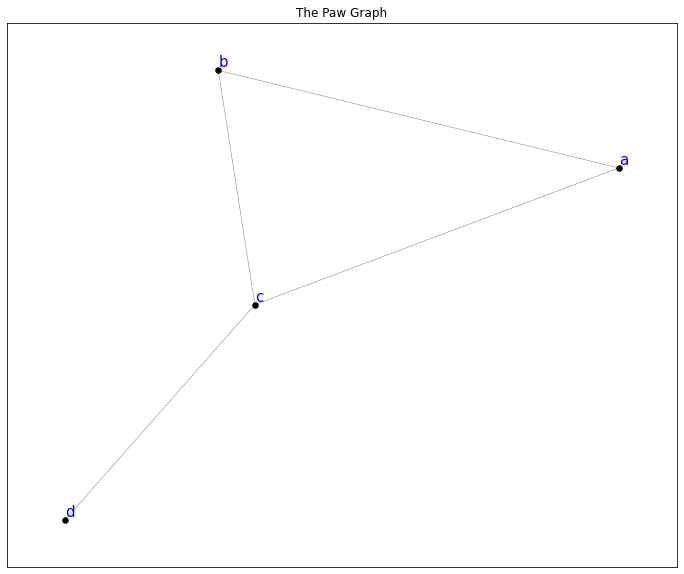

In [12]:
# Import the necessary python packages
import networkx as nx
import matplotlib.pyplot as plt

# Read the text file containing the edge list of a graph
G = nx.read_edgelist("paw_graph.txt")

# Print the vertices of G
print(f"The nodes of G are: V(G) = {G.nodes} \n")

# Print the edges of G
print(f"The edges of G are: E(G) = {G.edges} \n")

# Set your figure size
plt.figure(figsize=(12, 10))

# Set your pos
pos = nx.kamada_kawai_layout(G)

# Set your node options
node_options = {"node_color": "black", "node_size": 30}

# Set your edge options
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# Set your node label options
node_label_options = {"font_size": 15,
                      "font_color": "blue",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}

# Draw nodes
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **edge_options)

# Draw your labels
nx.draw_networkx_labels(G, pos, **node_label_options)

plt.title("The Paw Graph")
plt.show()

---

## Reading in Weighted Graph Edge Lists

In many instances we will want to associate a numerical value on the edges of a graph or network in question. For example, when constructing a network of members on a dating service, it may be beneficial to assign weights to the connections made by members. Such structures are called weighted graphs, or weighted networks. These graphs can be stored with **weighted edge lists**. The weighted edge list of a graph is a list of triples, where the first two entries of the triple represent the nodes in some edge and the 3 entry represents the weight assigned to this edge. 

NetworkX makes reading in weighted edge lists easy with the ``nx.read_weighted_edgelist(path_to_file)`` function. 


As before, you will need to have the correct path to your .txt file containing your weighted edge list. In my example, I have saved such a file as "sample_weighted_graph.txt" in my current working directory. The following code cell illustrates reading in this data. 


---

In [13]:
G = nx.read_weighted_edgelist("sample_weighted_graph.txt")

# Print the vertices.
print(f"The nodes of G are: V(G) = {G.nodes} \n")

# Print the edges. 
print(f"The edges of G are:")
for e in G.edges:
    print(e)

The nodes of G are: V(G) = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'] 

The edges of G are:
('a', 'b')
('a', 'c')
('b', 'c')
('b', 'e')
('c', 'd')
('d', 'e')
('d', 'g')
('d', 'f')
('e', 'f')
('f', 'h')
('g', 'h')


---

## Where are the weights?? 

Weighted edges are stored by NetworkX as triples, where the 3rd entry of each triple is a dictionary representing the data describing the edge in question. To illustrate this, see the following code cell. 

---

In [9]:
# The edges with attributes. 
print(f"The edges of G with data:")
for e in G.edges(data=True):
    print(e)
    
print("")

# The edges with attributes. 
print(f"The edges of G without data:")
for e in G.edges(data=True):
    print(e[0:2])
    
print("")

# The edges with attributes. 
print(f"The edges of G and the specific weight:")
for e in G.edges(data=True):
    print(f"{e[0:2]} has weight {e[2]['weight']}")

print("")

The edges of G with data:
('a', 'b', {'weight': 1.0})
('a', 'c', {'weight': 3.0})
('b', 'c', {'weight': 2.0})
('b', 'e', {'weight': 2.0})
('c', 'd', {'weight': 5.0})
('d', 'e', {'weight': 1.0})
('d', 'g', {'weight': 3.0})
('d', 'f', {'weight': 2.0})
('e', 'f', {'weight': 4.0})
('f', 'h', {'weight': 3.0})
('g', 'h', {'weight': 1.0})

The edges of G without data:
('a', 'b')
('a', 'c')
('b', 'c')
('b', 'e')
('c', 'd')
('d', 'e')
('d', 'g')
('d', 'f')
('e', 'f')
('f', 'h')
('g', 'h')

The edges of G and the specific weight:
('a', 'b') has weight 1.0
('a', 'c') has weight 3.0
('b', 'c') has weight 2.0
('b', 'e') has weight 2.0
('c', 'd') has weight 5.0
('d', 'e') has weight 1.0
('d', 'g') has weight 3.0
('d', 'f') has weight 2.0
('e', 'f') has weight 4.0
('f', 'h') has weight 3.0
('g', 'h') has weight 1.0



---

NetworkX can easily draw edges with edge labels by using the ``nx.draw_networkx_edge_labels(G, pos)`` function. However, one needs to specify which edge attributes are to be drawn. This can be done by creating a Python dictionary: 

``weights = {(u, v): z["weight"] for (u, v, z) in G.edges(data=True)}``

The following code cell demonstrates how this works. 

---

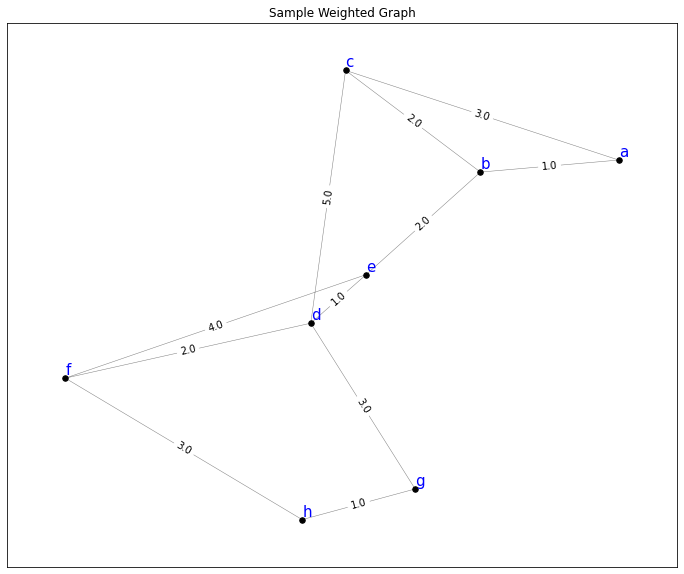

In [14]:
# Set your figure size
plt.figure(figsize=(12, 10))

# Set your pos
pos = nx.kamada_kawai_layout(G)

# Set your node options
node_options = {"node_color": "black", "node_size": 30}

# Set your edge options
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# Set your node label options
node_label_options = {"font_size": 15,
                      "font_color": "blue",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}


# Set your node label options
weights = {(u, v): z["weight"] for (u, v, z) in G.edges(data=True)}

edge_label_options = {"font_size": 10,
                      "font_color": "black",
                      "edge_labels": weights}

# Draw nodes
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **edge_options)

# Draw your node labels
nx.draw_networkx_labels(G, pos, **node_label_options)

# Draw your edge labels
nx.draw_networkx_edge_labels(G, pos, **edge_label_options)


plt.title("Sample Weighted Graph")
plt.show()

In [15]:
#!pip install pyvis
from pyvis.network import Network